# 필요한 라이브러리 불러오기

In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
from matplotlib import pyplot as plt, font_manager  # Matlab-style plotting과 한글폰트 사용을 위한 font_manager
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import datetime
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

pd.options.display.max_columns = 999 # Max Column 보여지게 함.

# 한글폰트 사용
import os

if os.name == 'nt':
    font_dir = font_manager.win32FontDirectory()
else:
    font_dir = '/Users/pydata/Library/Fonts'

font_path = os.path.join(font_dir, 'SourceHanSansK-Regular.otf')
font = font_manager.FontProperties(fname=font_path, size=14)

from matplotlib import pyplot as plt, rcParams

#여기에서 지정된 설정은 초기 설정 값으로 이용된다
rcParams['font.sans-serif'] = 'Source Han Sans K'
rcParams['font.weight'] = 'regular'
rcParams['axes.titlesize'] = 15
rcParams['ytick.labelsize'] = 12
rcParams['xtick.labelsize'] = 12

# 데이터 불러오기

In [2]:
# Data read
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

# Data Scaling 및 기타 편하게 하기 위해 all_df로 묶음.
all_df = [train_df, test_df]

# train_df의 label을 뺴놓음
y_train_df = train_df[['id','price']]

In [3]:
train_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,1,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
2,2,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503
3,3,20140627T000000,257500.000,3,2.250,1715,6819,2.000,0,0,3,7,1715,0,1995,0,98003,47.310,-122.327,2238,6819
4,4,20150115T000000,291850.000,3,1.500,1060,9711,1.000,0,0,3,7,1060,0,1963,0,98198,47.410,-122.315,1650,9711


In [4]:
y_train_df.head()

,id,price
0,0,221900.000
1,1,180000.000
2,2,510000.000
3,3,257500.000
4,4,291850.000


# 데이터 탐색 및 시각화

- ID : 집을 구분하는 번호
- date : 집을 구매한 날짜
- price : 집의 가격(Target variable)
- bedrooms : 침실의 수
- bathrooms : 침실 개수 당 화장실의 수(화장실의 수 / 침실의 수 )
- sqft_living : 주거 공간의 평방 피트(면적)
- sqft_lot : 부지의 평방 피트(면적)
- floors : 집의 층 수
- waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
- view : 집이 얼마나 좋아 보이는지의 정도
- condition : 집의 전반적인 상태
- grade : King County grading 시스템 기준으로 매긴 집의 등급
- sqft_above : 지하실을 제외한 평방 피트(면적)
- sqft_basement : 지하실의 평방 피트(면적)
- yr_built : 지어진 년도
- yr_renovated : 집을 재건축한 년도
- zipcode : 우편번호
- lat : 위도
- long : 경도
- sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
- sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

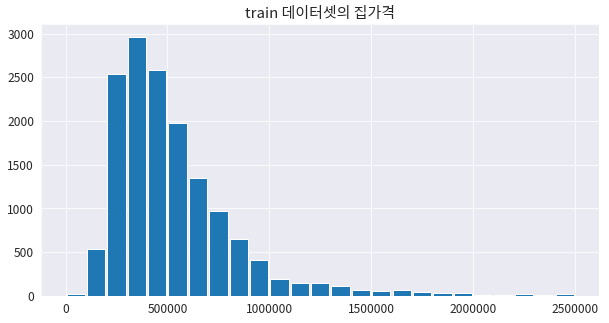

In [5]:
#  price 분포확인
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.hist(y_train_df["price"], rwidth=0.9, bins=25, range=(0, 2500000))
ax.set_title('train 데이터셋의 집가격')
plt.show()

> - skew가 한쪽에 기울어진 분포다.  
> - 나중에 log scale로 정규분포로 바꿔준다.

In [6]:
 train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


> - date column 만 오브젝트고 나머지는 다 연속형 데이터.  
> - 연속형이지만 bedrooms 등 실질적으로는 카테고리형데이터와 마찬가지인 컬럼이 있다.  
> - date는 year와 month로 나눠줄 필요있다. 
> - lat : 위도, long : 경도를 통해 대도심과의 스칼라 경도거리를 계산하여 집값에 영향을 끼칠수도 있을듯.

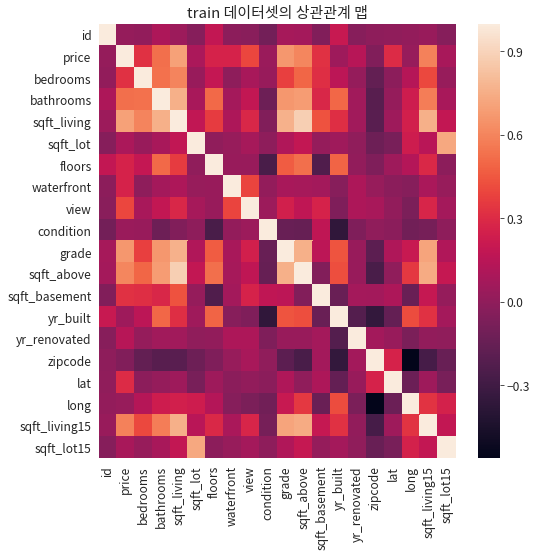

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

sns.heatmap(train_df.corr(), ax=ax)
ax.set_title('train 데이터셋의 상관관계 맵')
plt.show()

In [8]:
train_df.corr()['price'].sort_values(ascending=False)

price            1.000
sqft_living      0.703
grade            0.667
sqft_above       0.609
sqft_living15    0.586
bathrooms        0.525
view             0.401
bedrooms         0.324
sqft_basement    0.322
lat              0.302
waterfront       0.266
floors           0.263
yr_renovated     0.141
sqft_lot         0.097
sqft_lot15       0.086
yr_built         0.047
condition        0.040
long             0.024
id               0.021
zipcode         -0.051
Name: price, dtype: float64

In [9]:
# date의 진짜 date부분만 남기고 나머지는 날리자. 그담에 년,월,일,요일까지 뽑자.
train_df['date_parse'] =train_df['date'].map(lambda x : x[:8])
train_df.drop('date', axis=1, inplace=True)

# 년, 월, 일, 요일 순으로 Column 만들기
train_df['buy_year'] = train_df['date_parse'].map(lambda x : x[:4])
train_df['buy_month'] = train_df['date_parse'].map(lambda x : x[4:6])
train_df['buy_day'] = train_df['date_parse'].map(lambda x : x[6:8])
train_df['buy_day_of_week'] = pd.to_datetime(train_df['date_parse'], format='%Y%m%d').dt.weekday_name


>요일로 바꾸는거 참고 stackoverflow  
https://stackoverflow.com/questions/39548139/faster-way-of-converting-date-column-to-weekday-name-in-pandas

각 컬럼의 분포와 히스토그램 살펴보자.

nan 분포 확인해보자

In [10]:
train_df.isnull().sum()/len(train_df)

id                0.000
price             0.000
bedrooms          0.000
bathrooms         0.000
sqft_living       0.000
sqft_lot          0.000
floors            0.000
waterfront        0.000
view              0.000
condition         0.000
grade             0.000
sqft_above        0.000
sqft_basement     0.000
yr_built          0.000
yr_renovated      0.000
zipcode           0.000
lat               0.000
long              0.000
sqft_living15     0.000
sqft_lot15        0.000
date_parse        0.000
buy_year          0.000
buy_month         0.000
buy_day           0.000
buy_day_of_week   0.000
dtype: float64

>결과 : null 값 없다

컬럼들을 일단 리스트로 만들어 놓자

In [12]:
col_list = train_df.columns.tolist()
col_list.remove('id')
col_list.remove('date_parse')

In [13]:
col_list

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'buy_year',
 'buy_month',
 'buy_day',
 'buy_day_of_week']

# Data Visualization
- int, float은 scatter, hist로 그래프그림
- category는 박스플랏, hist 분포를 unique별로 그림.

### 중간결과들
1. 그냥 plot 했을때 Category data가 없어서 다 scatter인데 실질적으로 category 같은 데이터들이 있음.
- unique 갯수가 30개 이하이면 아마 category 같은 연속형데이터이므로 다 object 타입으로 바꿔주자.
2. 오브젝트 타입이 몇개 생겼는데 dateparse 제외 년월일은 int, week는 category로 만들자.

In [14]:
train_df['buy_year'] = train_df['buy_year'].astype('int64')
train_df['buy_day'] = train_df['buy_day'].astype('int64')
train_df['buy_month'] = train_df['buy_month'].astype('int64')
train_df['buy_day_of_week'] = train_df['buy_day_of_week'].astype('category')

In [20]:
col_like_category = []
for col in col_list:
    길이 = len(train_df[col].unique())
    print(col, ": ",길이)
    if 길이 < 100:
        print("항목들 : ",np.sort(train_df[col].unique()))
        col_like_category.append(col)

price :  3263
bedrooms :  11
항목들 :  [ 0  1  2  3  4  5  6  7  8  9 10]
bathrooms :  29
항목들 :  [0.   0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
 3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.75 7.5  7.75
 8.  ]
sqft_living :  863
sqft_lot :  7678
floors :  6
항목들 :  [1.  1.5 2.  2.5 3.  3.5]
waterfront :  2
항목들 :  [0 1]
view :  5
항목들 :  [0 1 2 3 4]
condition :  5
항목들 :  [1 2 3 4 5]
grade :  12
항목들 :  [ 1  3  4  5  6  7  8  9 10 11 12 13]
sqft_above :  789
sqft_basement :  271
yr_built :  116
yr_renovated :  65
항목들 :  [   0 1940 1944 1945 1946 1948 1950 1954 1955 1956 1957 1958 1962 1963
 1964 1965 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015]
zipcode :  70
항목들 :  [98001 98002 98003 98004 98005 98006 98007 98008 98010 98011 98014 98019
 98022 98023 98024 980

In [21]:
col_like_category

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_renovated',
 'zipcode',
 'buy_year',
 'buy_month',
 'buy_day',
 'buy_day_of_week']

price


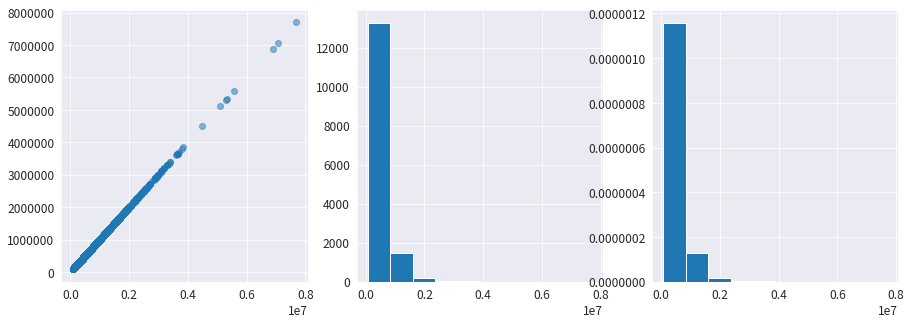

bedrooms


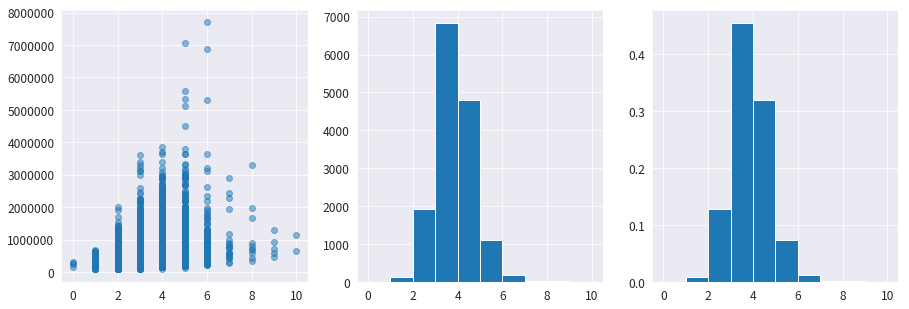

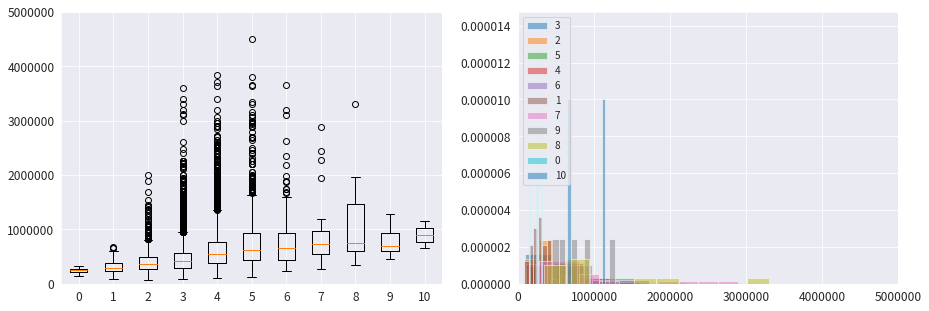

bathrooms


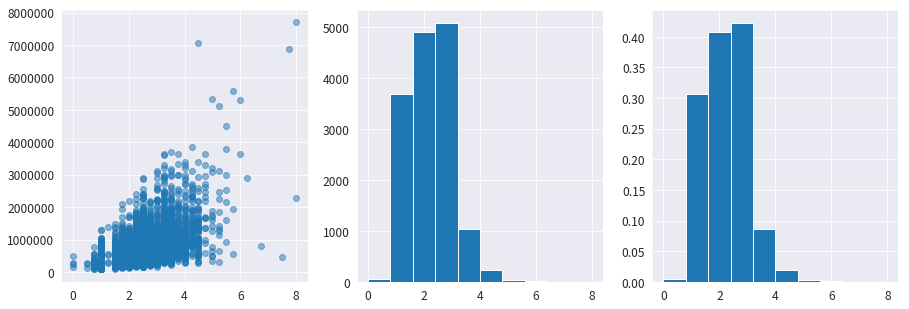

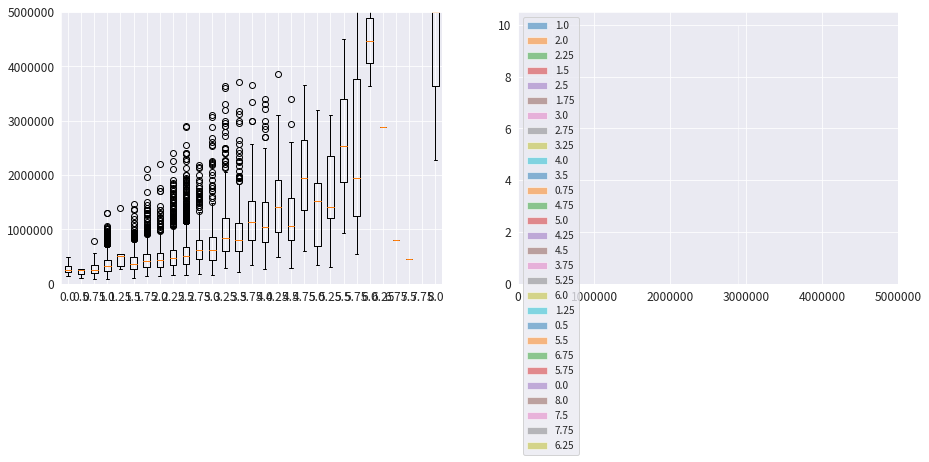

sqft_living


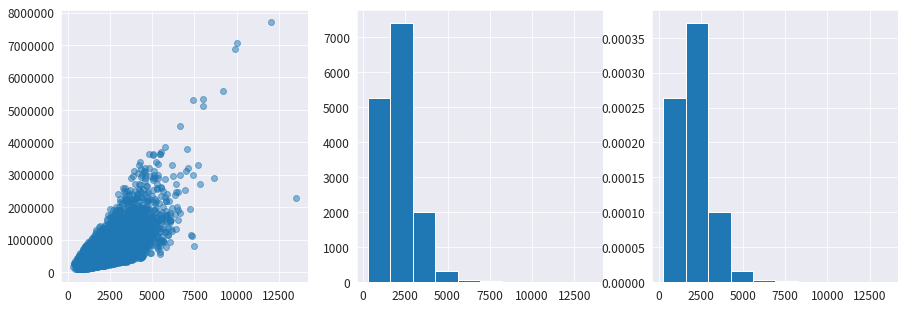

sqft_lot


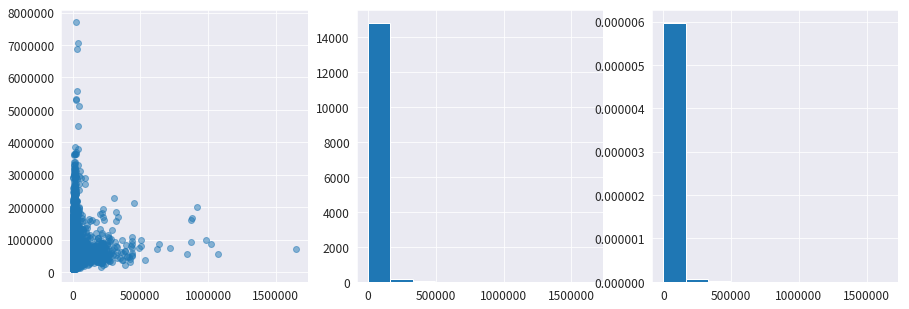

floors


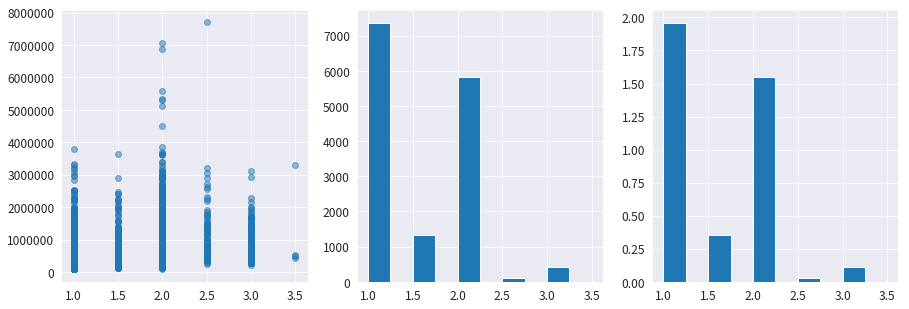

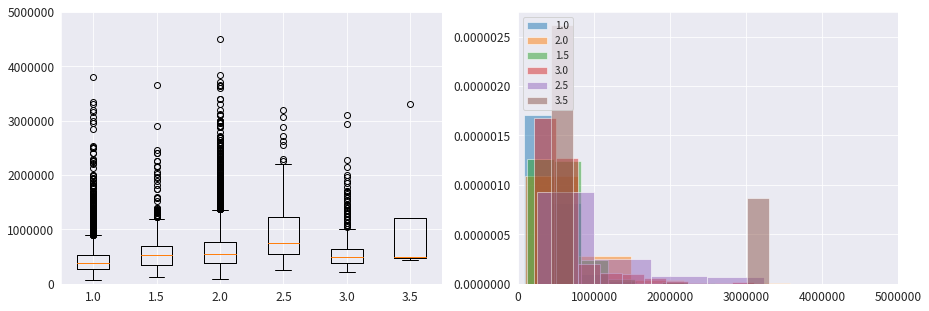

waterfront


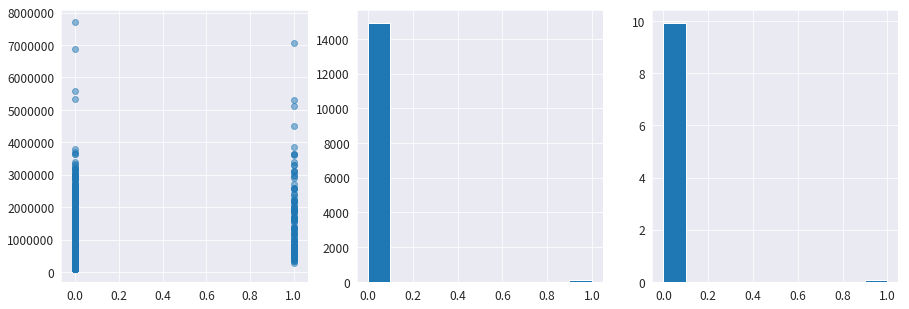

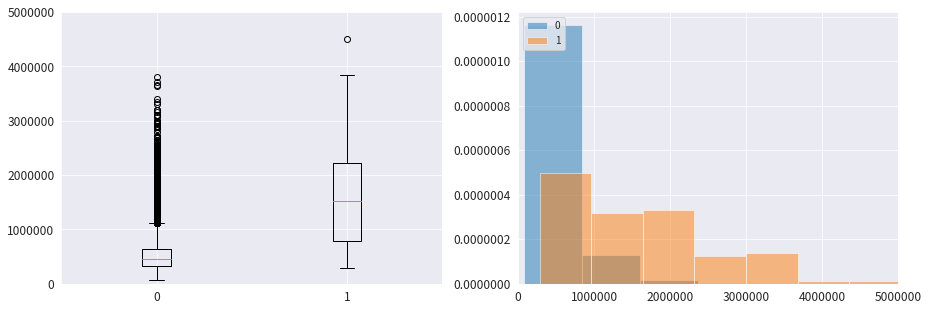

view


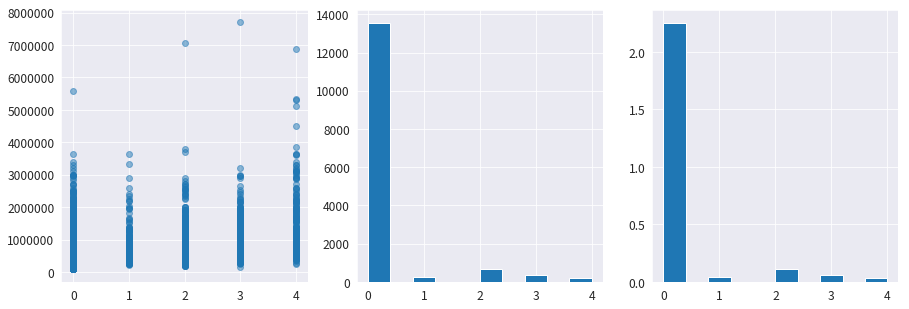

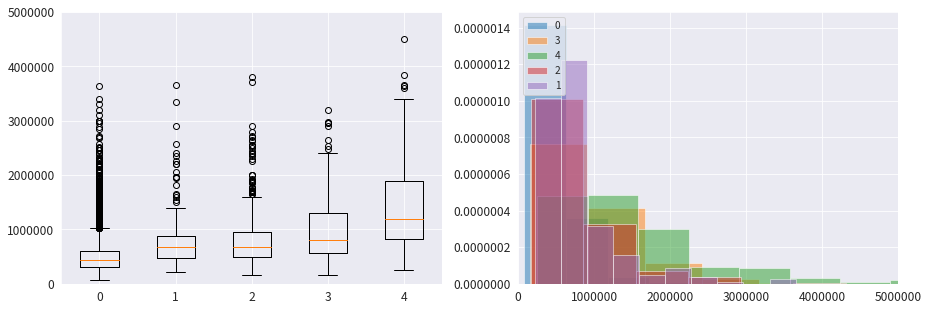

condition


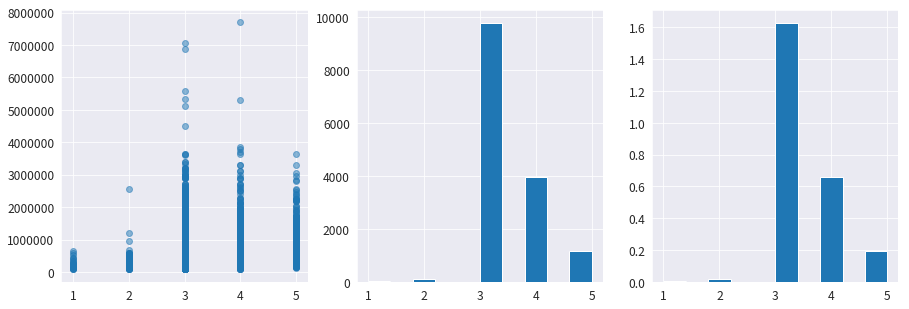

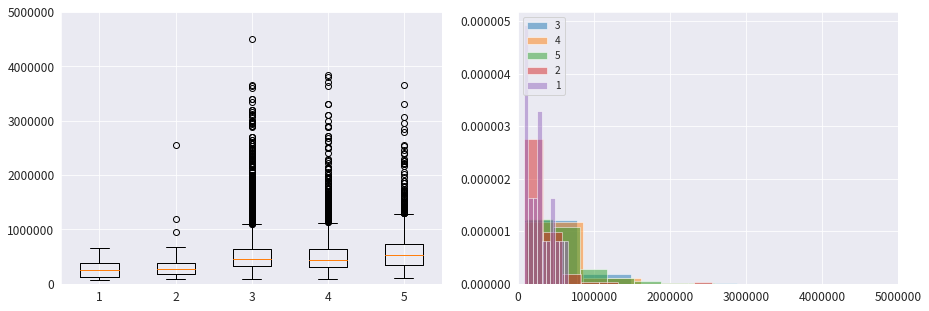

grade


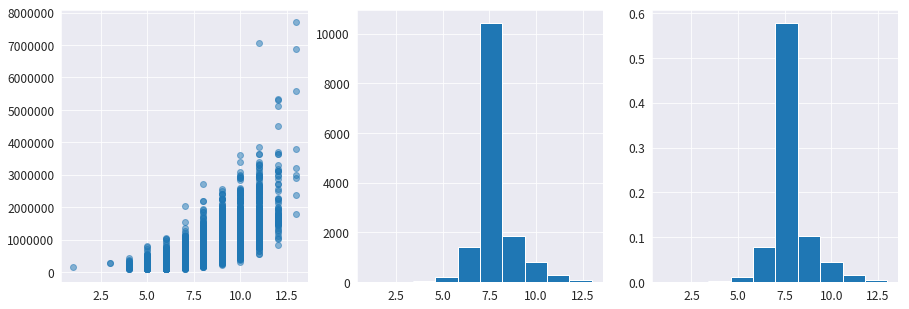

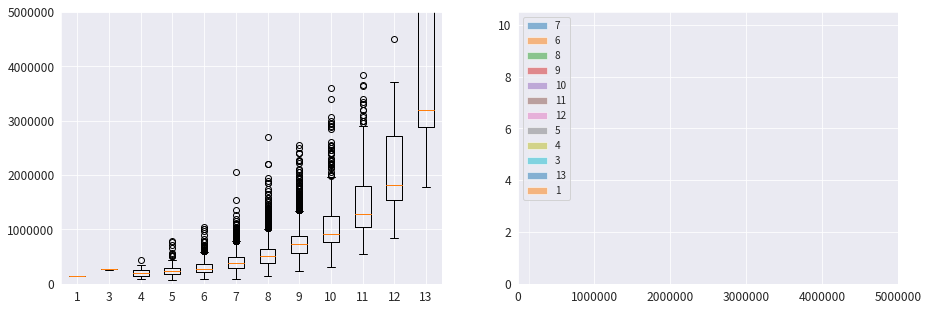

sqft_above


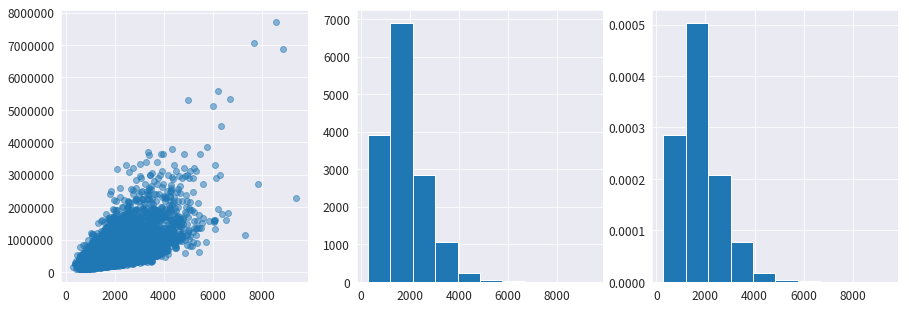

sqft_basement


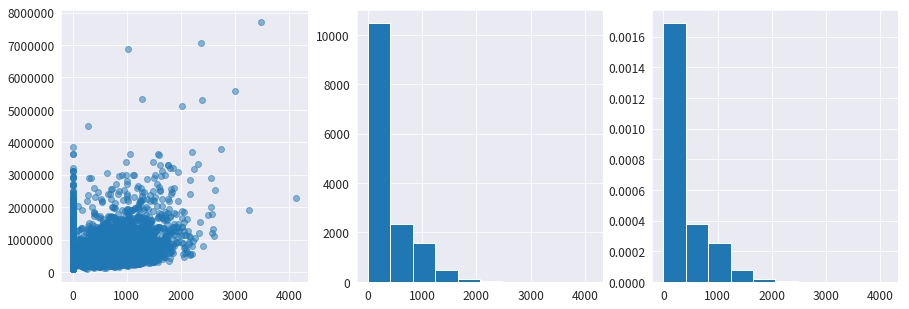

yr_built


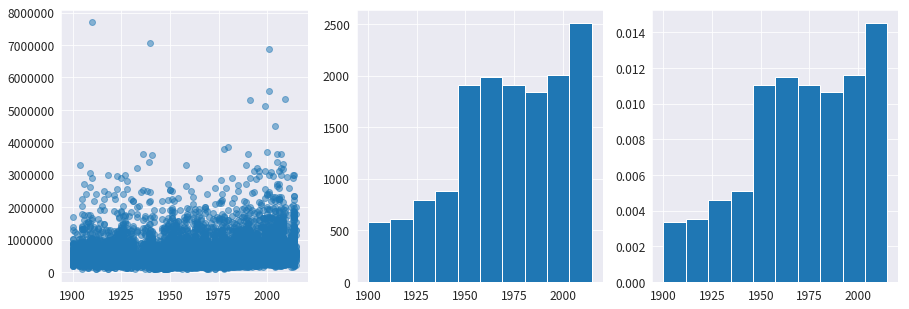

yr_renovated


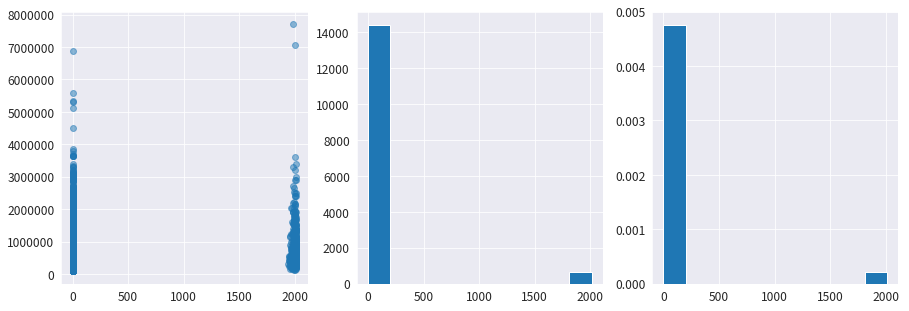

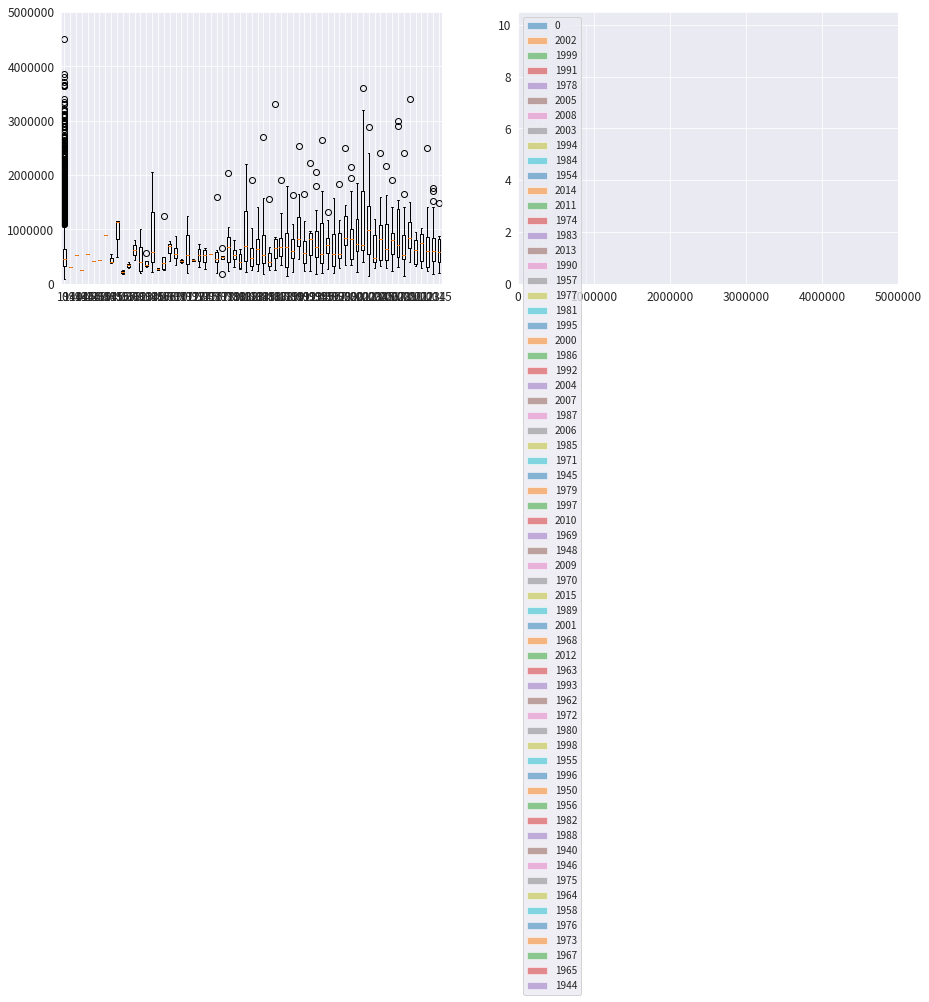

zipcode


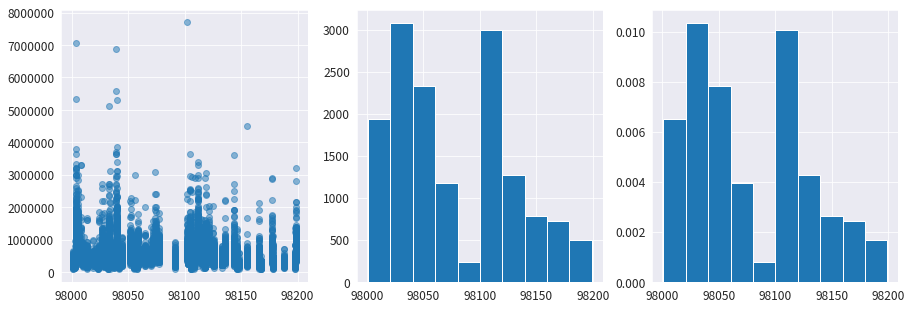

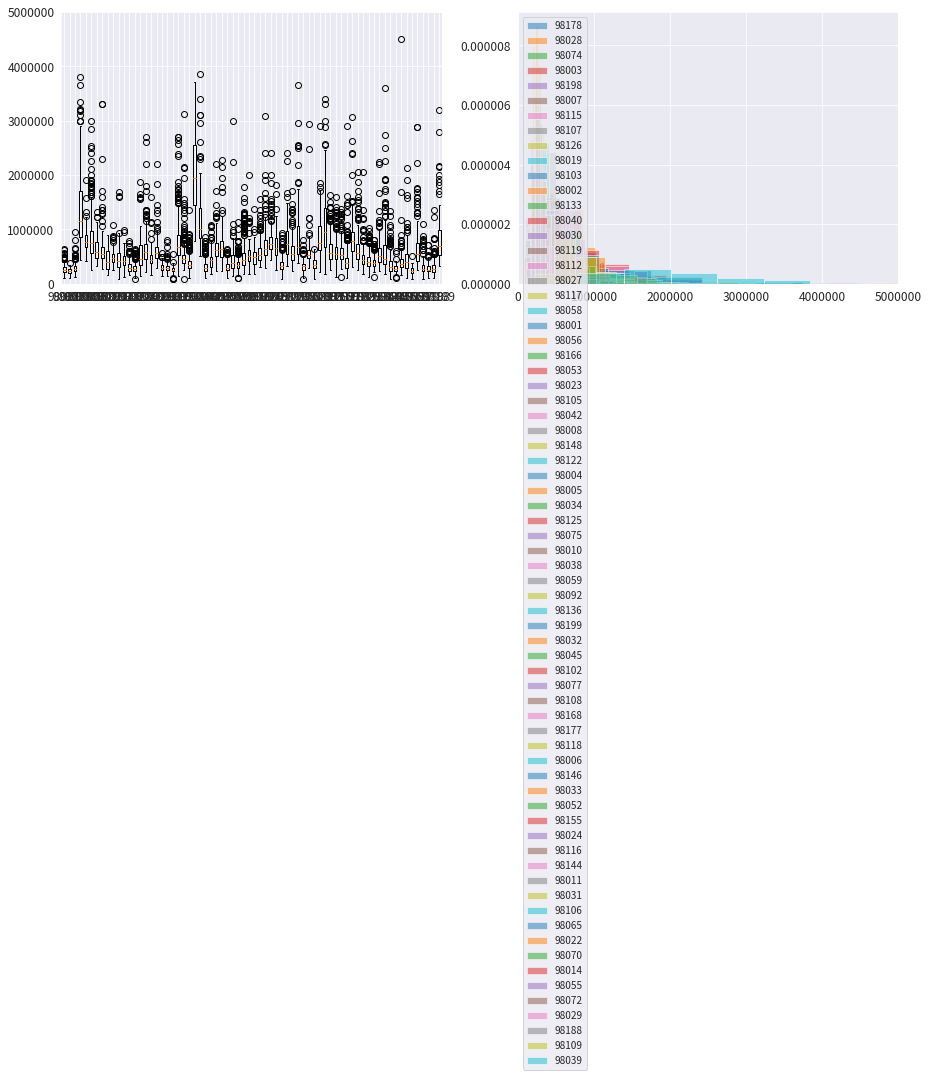

lat


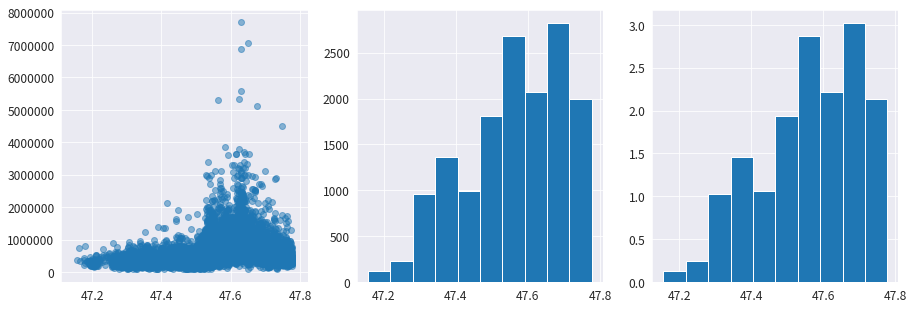

long


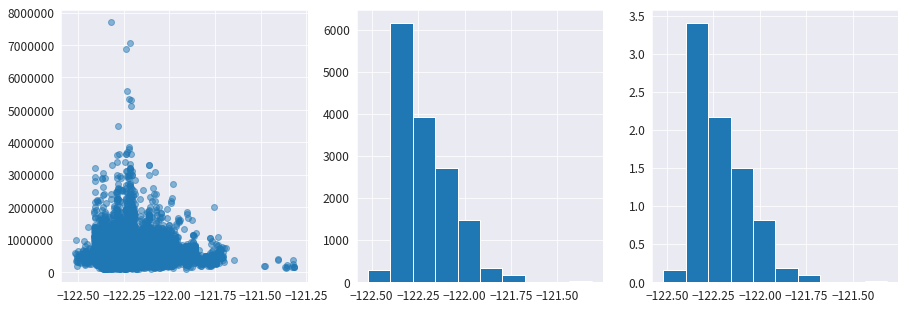

sqft_living15


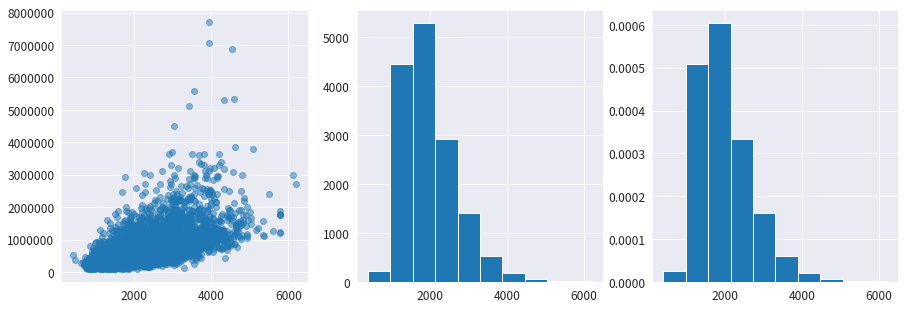

sqft_lot15


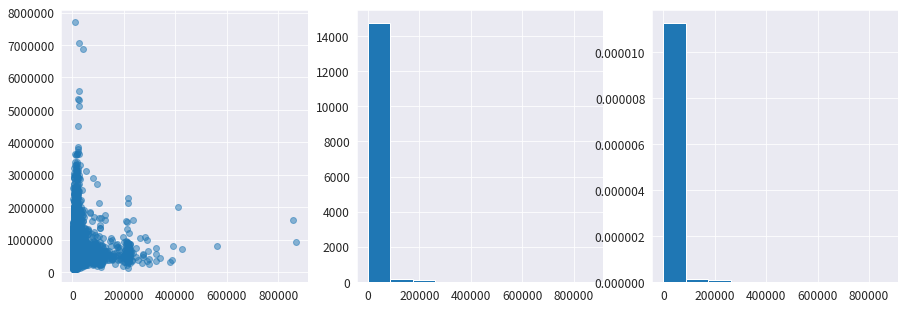

buy_year


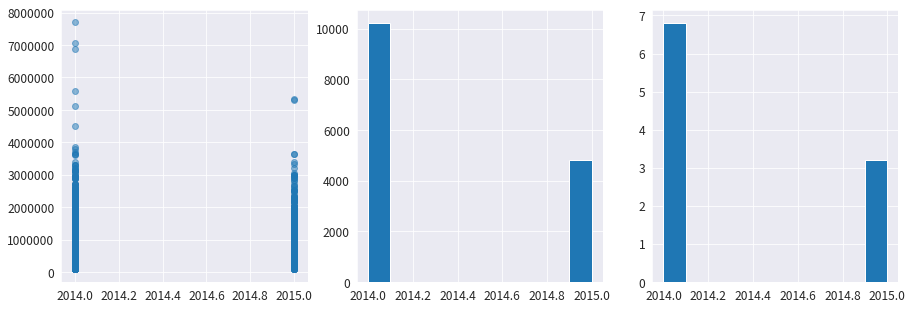

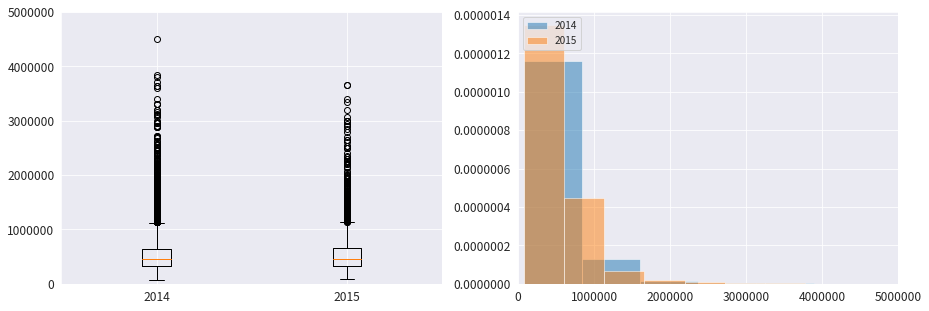

buy_month


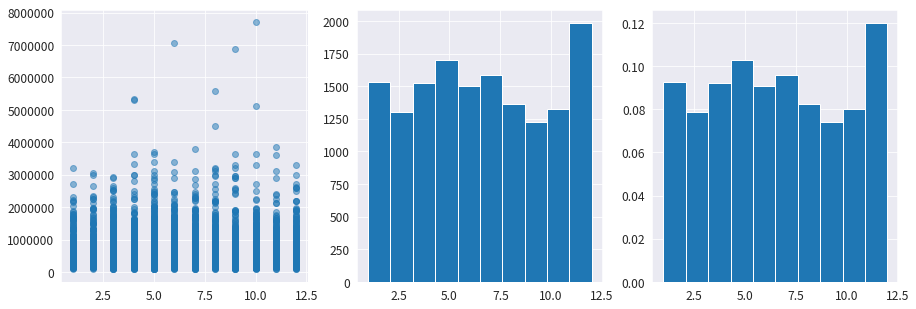

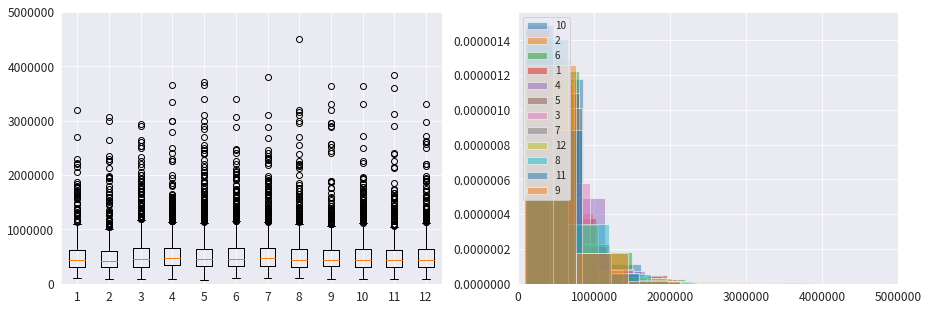

buy_day


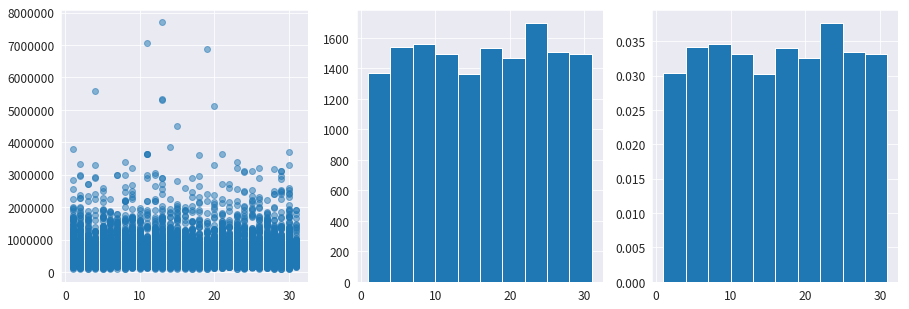

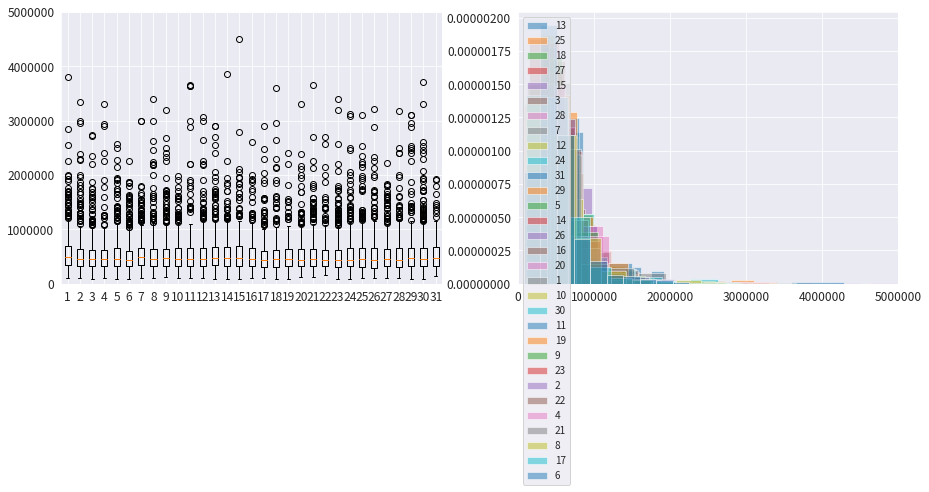

buy_day_of_week


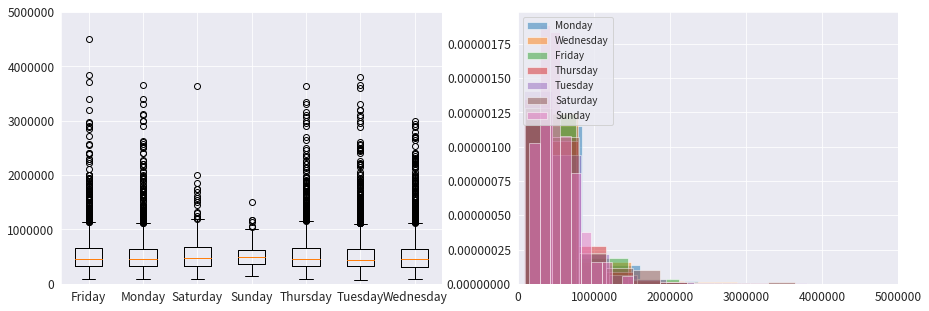

In [34]:
#위의 nan_value_index에 대해 int, float 이면 scatter, category면 boxplot으로 plot 하자. train_df만 하자
for col in col_list:
    print(col)
    if train_df[col].dtype in ['int64', 'float64']:
        x = train_df[col]
        y = train_df['price']
        
        fig = plt.figure(figsize=(15,5))
        ax1 = fig.add_subplot(131)
        ax2 = fig.add_subplot(132)
        ax3 = fig.add_subplot(133)
        
        ax1.scatter(x, y, alpha=0.5)
        ax2.hist(train_df[col])
        ax3.hist(train_df[col], normed=True)
        plt.show()
    if col in col_like_category:
        labels = []
        types_list = []

        for label, df_per_type in train_df.groupby(col):
            labels.append(label)
            types_list.append(df_per_type['price'].tolist())

        fig = plt.figure(figsize=(15,5))
        ax1 = fig.add_subplot(121)
        ax1.boxplot(types_list, labels=labels)
        ax1.set_ylim(0,5000000)
        
        ax2 = fig.add_subplot(122)
        for feat in train_df[col].unique():
            ax2.hist(train_df['price'].loc[train_df[col]==feat], label=str(feat), alpha=0.5, normed=True)
        ax2.legend(loc='upper left')
        ax2.set_xlim(0,5000000)
            
        
        
        plt.show()
        
#         x = train_df[col]
#         y = train_df['price']

#         fig = plt.figure(figsize=(20,10))
#         ax1 = fig.add_subplot(131)
#         ax2 = fig.add_subplot(132)
#         ax3 = fig.add_subplot(133)
        
#         ax1.boxplot(y)
#         for feat in train_df[col].unique():
#             ax2.hist(train_df['SalePrice'].loc[train_df[col]==feat], label=str(feat), alpha=0.5)
#         ax2.legend(loc='upper left')
#         for feat in train_df[col].unique():
#             ax3.hist(train_df['SalePrice'].loc[train_df[col]==feat], label=str(feat), alpha=0.5, normed=True)
#         ax3.legend(loc='upper left')
#         plt.show()

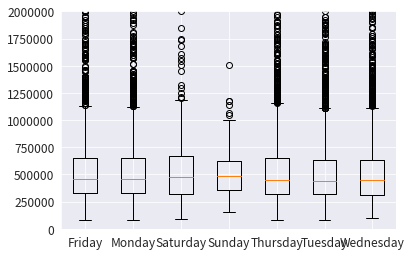

In [117]:
# fig = plt.figure(figsize=(20,10))
# ax = fig.add_subplot(111)
# ax.boxplot(train_df['price'], labels=train_df['buy_day_of_week'])

labels = []
types_list = []

for label, df_per_type in train_df.groupby('buy_day_of_week'):
    labels.append(label)
    types_list.append(df_per_type['price'].tolist())
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(types_list, labels=labels)
ax.set_ylim(0,2000000)

plt.show()

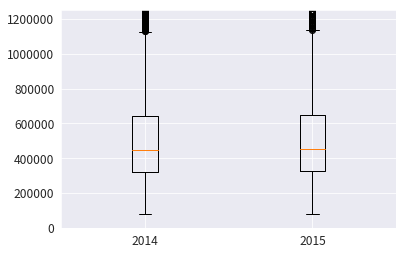

In [121]:
labels = []
types_list = []

for label, df_per_type in train_df.groupby('buy_year'):
    labels.append(label)
    types_list.append(df_per_type['price'].tolist())
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(types_list, labels=labels)
ax.set_ylim(0,1250000)

plt.show()

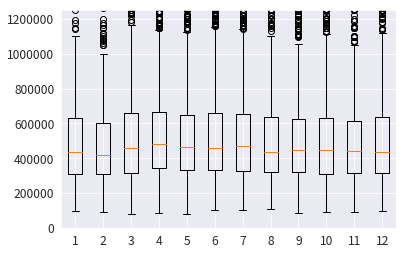

In [120]:
labels = []
types_list = []

for label, df_per_type in train_df.groupby('buy_month'):
    labels.append(label)
    types_list.append(df_per_type['price'].tolist())
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(types_list, labels=labels)
ax.set_ylim(0,1250000)

plt.show()

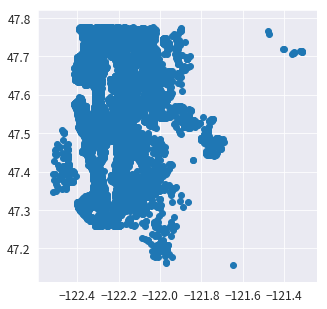

In [109]:
a = train_df['zipcode'].value_counts()
x = train_df['long']
y = train_df['lat']
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(x, y)
plt.show()

(array([2.770e+02, 6.159e+03, 3.918e+03, 2.712e+03, 1.464e+03, 3.350e+02,
        1.550e+02, 1.000e+00, 2.000e+00, 1.200e+01]),
 array([-122.519 , -122.3986, -122.2782, -122.1578, -122.0374, -121.917 ,
        -121.7966, -121.6762, -121.5558, -121.4354, -121.315 ]),
 <a list of 10 Patch objects>)

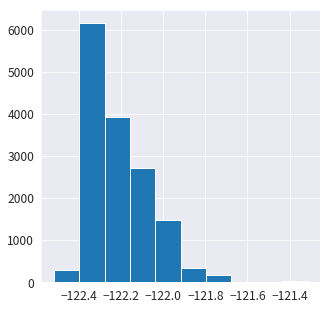

In [110]:
x = train_df['long']
y = train_df['lat']
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.hist(x)

(array([ 121.,  229.,  954., 1363.,  991., 1806., 2680., 2076., 2825.,
        1990.]),
 array([47.1559 , 47.21807, 47.28024, 47.34241, 47.40458, 47.46675,
        47.52892, 47.59109, 47.65326, 47.71543, 47.7776 ]),
 <a list of 10 Patch objects>)

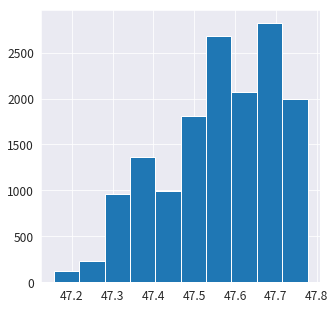

In [111]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.hist(y)